<a href="https://colab.research.google.com/github/piyush-bhandari-commits/ml-projects/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file 

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ECE 657/q2_dataset.csv')

In [ ]:
data.head()
data_sort = data.sort_index(ascending=False)
data_sort.head()

,Date,Close/Last,Volume,Open,High,Low
1258,07/09/15,$120.07,78291510,123.85,124.06,119.22
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58


In [ ]:
data_sort['Date'] = pd.to_datetime(data_sort.Date)
data_sort.index = data_sort['Date']
del data_sort['Date']
data_sort.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2015-07-09,$120.07,78291510,123.85,124.06,119.22
2015-07-10,$123.28,61292800,121.94,123.85,121.21
2015-07-13,$125.66,41365600,125.03,125.76,124.32
2015-07-14,$125.61,31695870,126.04,126.37,125.04
2015-07-15,$126.82,33559770,125.72,127.15,125.58


In [ ]:
columns = ['Close', 'Volume', 'Open', 'High', 'Low']
data_sort.columns = columns
data_sort.head()

,Close,Volume,Open,High,Low
Date,,,,,
2015-07-09,$120.07,78291510,123.85,124.06,119.22
2015-07-10,$123.28,61292800,121.94,123.85,121.21
2015-07-13,$125.66,41365600,125.03,125.76,124.32
2015-07-14,$125.61,31695870,126.04,126.37,125.04
2015-07-15,$126.82,33559770,125.72,127.15,125.58


In [ ]:
data_sort['Close'] = data_sort['Close'].str.replace('$', '')
del data_sort['Close']

data_sort.head()

,Volume,Open,High,Low
Date,,,,
2015-07-09,78291510,123.85,124.06,119.22
2015-07-10,61292800,121.94,123.85,121.21
2015-07-13,41365600,125.03,125.76,124.32
2015-07-14,31695870,126.04,126.37,125.04
2015-07-15,33559770,125.72,127.15,125.58


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# dataset = data_sort.values
# dataset.astype('float32')
# scaler = MinMaxScaler(feature_range = (0,1))
# dataset = scaler.fit_transform(dataset)

In [ ]:
import numpy as np

def create_dataset(np_data):
    features = []
    labels = []
    window = 3
    for i in range(window , len(np_data)):
        a = np_data[i - window : i , :]
        # a = np_data[0:i,:]
        features.append(a)
        labels.append(np_data[i][1])
    return features, labels

dataset = data_sort.values
X , y = create_dataset(dataset)

In [ ]:
type(X), type(y)

(list, list)

In [ ]:
len(X)

1256

In [ ]:
X[0]

array([[7.829151e+07, 1.238500e+02, 1.240600e+02, 1.192200e+02],
       [6.129280e+07, 1.219400e+02, 1.238500e+02, 1.212100e+02],
       [4.136560e+07, 1.250300e+02, 1.257600e+02, 1.243200e+02]])

In [ ]:
X[1]

array([[6.129280e+07, 1.219400e+02, 1.238500e+02, 1.212100e+02],
       [4.136560e+07, 1.250300e+02, 1.257600e+02, 1.243200e+02],
       [3.169587e+07, 1.260400e+02, 1.263700e+02, 1.250400e+02]])

In [ ]:
X[2]

array([[4.136560e+07, 1.250300e+02, 1.257600e+02, 1.243200e+02],
       [3.169587e+07, 1.260400e+02, 1.263700e+02, 1.250400e+02],
       [3.355977e+07, 1.257200e+02, 1.271500e+02, 1.255800e+02]])

In [ ]:
X[3]

array([[3.169587e+07, 1.260400e+02, 1.263700e+02, 1.250400e+02],
       [3.355977e+07, 1.257200e+02, 1.271500e+02, 1.255800e+02],
       [3.598763e+07, 1.277400e+02, 1.285700e+02, 1.273500e+02]])

In [ ]:
y[0], y[1]

(126.04, 125.72)

In [ ]:
import random
random.seed(24)
full_data = list(zip(X, y))
print (type(full_data))
random.shuffle(full_data)
full_data[1]

<class 'list'>


(array([[2.155027e+07, 1.436900e+02, 1.447900e+02, 1.427200e+02],
        [2.411033e+07, 1.430200e+02, 1.435000e+02, 1.424100e+02],
        [1.852700e+07, 1.429000e+02, 1.447500e+02, 1.429000e+02]]), 144.11)

In [ ]:
# Splitting the data into train and test data
train_size = int(len(full_data)*0.70)
test_size = len(full_data) - train_size
train_size, test_size

(879, 377)

In [ ]:
type(full_data)

list

In [ ]:
train_data = full_data[:train_size]
test_data = full_data[train_size: len(full_data)]
len(train_data), len(test_data)

(879, 377)

In [ ]:
X_train , y_train = zip(*train_data)
X_test , y_test = zip(*test_data)

In [ ]:
X_train[0], y_train[0]

(array([[6.527095e+07, 1.706000e+02, 1.712200e+02, 1.654300e+02],
        [3.639659e+07, 1.668400e+02, 1.669200e+02, 1.640900e+02],
        [3.367496e+07, 1.656700e+02, 1.663300e+02, 1.612200e+02]]), 162.62)

In [ ]:
np.array(X_train).shape, np.array(y_train).shape

((879, 3, 4), (879,))

In [ ]:
np_X_train = np.array(X_train)
np_X_test = np.array(X_test)

In [ ]:
np_X_train[1]

array([[2.155027e+07, 1.436900e+02, 1.447900e+02, 1.427200e+02],
       [2.411033e+07, 1.430200e+02, 1.435000e+02, 1.424100e+02],
       [1.852700e+07, 1.429000e+02, 1.447500e+02, 1.429000e+02]])

In [ ]:
list_train_data = [list(np.array(item).ravel()) for item in np_X_train]

In [ ]:
final_train_data = pd.DataFrame(list_train_data)
final_train_data['label'] = y_train

In [ ]:
final_train_data.to_csv('/content/drive/My Drive/Colab Notebooks/ECE 657/a3/data/train_data_RNN_1.csv', index=False)

In [ ]:
list_test_data = [list(np.array(item).ravel()) for item in np_X_test]

In [ ]:
final_test_data = pd.DataFrame(list_test_data)
final_test_data['label'] = y_test
final_test_data.shape

(377, 13)

In [ ]:
final_test_data.to_csv('/content/drive/My Drive/Colab Notebooks/ECE 657/a3/data/test_data_RNN_1.csv', index=False)

In [ ]:
raw_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ECE 657/a3/data/train_data_RNN_1.csv')
raw_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ECE 657/a3/data/test_data_RNN_1.csv')

In [ ]:
raw_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,65270950.0,170.60,171.22,165.43,36396590.0,166.84,166.92,164.09,33674960.0,165.67,166.33,161.22,162.62
1,21550270.0,143.69,144.79,142.72,24110330.0,143.02,143.50,142.41,18527000.0,142.90,144.75,142.90,144.11
2,11654360.0,266.60,268.00,265.90,23693550.0,267.27,268.25,263.45,29377270.0,258.31,259.53,256.29,261.07
3,19620520.0,175.24,176.80,174.94,36387880.0,175.04,175.09,171.26,41335980.0,170.00,172.68,168.60,168.39
4,33490630.0,101.41,102.24,100.15,27368840.0,102.24,102.28,101.50,25058280.0,101.91,102.91,101.78,103.96


In [ ]:
X_train_df = raw_train.iloc[:, 0:12] 
y_train_df = raw_train.iloc[:, 12]

X_test_df = raw_test.iloc[:, 0:12] 
y_test_df = raw_test.iloc[:, 12]

In [ ]:
X_train_np = X_train_df.values.astype('float32')
X_test_np = X_test_df.values.astype('float32')

y_train_np = y_train_df.values.astype('float32')
y_test_np = y_test_df.values.astype('float32')

In [ ]:
X_train_np[:1]

array([[6.527095e+07, 1.706000e+02, 1.712200e+02, 1.654300e+02,
        3.639659e+07, 1.668400e+02, 1.669200e+02, 1.640900e+02,
        3.367496e+07, 1.656700e+02, 1.663300e+02, 1.612200e+02]],
      dtype=float32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = feature_scaler.fit_transform(X_train_np)
X_test_scaled = feature_scaler.transform(X_test_np)

In [ ]:
X_train_scaled[:1]

array([[0.35815004, 0.29296312, 0.28338856, 0.2767818 , 0.20496827,
        0.27655208, 0.26807022, 0.2704903 , 0.14759356, 0.26396745,
        0.25989398, 0.25588447]], dtype=float32)

In [ ]:
y_train_np[:5]

array([162.62, 144.11, 261.07, 168.39, 103.96], dtype=float32)

In [ ]:
label_scaler = MinMaxScaler(feature_range=(0,1))
y_train_scaled = label_scaler.fit_transform(y_train_np.reshape(-1,1))
y_test_scaled = label_scaler.transform(y_test_np.reshape(-1,1))

In [ ]:
y_train_scaled.shape, y_test_scaled.shape

((879, 1), (377, 1))

In [ ]:
y_train_scaled[:5]

array([[0.25444093],
       [0.18958691],
       [0.59938335],
       [0.27465752],
       [0.04891208]], dtype=float32)

In [ ]:
# Reshaping training data for input to LSTM
X_train = X_train_scaled.reshape(879, 3, 4)
X_test = X_test_scaled.reshape(377, 3, 4)

y_train = y_train_scaled
y_test = y_test_scaled

In [ ]:
X_train[:2]

array([[[0.35815004, 0.29296312, 0.28338856, 0.2767818 ],
        [0.20496827, 0.27655208, 0.26807022, 0.2704903 ],
        [0.14759356, 0.26396745, 0.25989398, 0.25588447]],

       [[0.06768662, 0.19515124, 0.18923444, 0.19403148],
        [0.10391586, 0.19082242, 0.18463898, 0.19134021],
        [0.04688013, 0.18194586, 0.18363956, 0.1905492 ]]], dtype=float32)

In [ ]:
y_train[:5]

array([[0.25444093],
       [0.18958691],
       [0.59938335],
       [0.27465752],
       [0.04891208]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

Using TensorFlow backend.


In [ ]:
model = Sequential()
# 50 and True
model.add(LSTM(units=80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# # model.add(Dropout(0.2))
# model.add(LSTM(units=40, return_sequences=True))
# # model.add(Dropout(0.2))
# model.add(LSTM(units=32, return_sequences=True))
# # model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 80)             27200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 78,801
Trainable params: 78,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
879/879 [==============================] - 1s 979us/step - loss: 0.0641
Epoch 2/100
879/879 [==============================] - 0s 188us/step - loss: 0.0321
Epoch 3/100
879/879 [==============================] - 0s 205us/step - loss: 0.0041
Epoch 4/100
879/879 [==============================] - 0s 217us/step - loss: 9.8388e-04
Epoch 5/100
879/879 [==============================] - 0s 201us/step - loss: 4.4904e-04
Epoch 6/100
879/879 [==============================] - 0s 218us/step - loss: 2.9992e-04
Epoch 7/100
879/879 [==============================] - 0s 229us/step - loss: 2.7063e-04
Epoch 8/100
879/879 [==============================] - 0s 203us/step - loss: 2.4727e-04
Epoch 9/100
879/879 [==============================] - 0s 211us/step - loss: 2.3202e-04
Epoch 10/100
879/879 [==============================] - 0s 194us/step - loss: 2.2607e-04
Epoch 11/100
879/879 [==============================] - 0s 200us/step - loss: 2.3086e-04
Epoch 12/100
879/879 [====================

In [ ]:
import math
from sklearn.metrics import mean_squared_error
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
train_predictions = label_scaler.inverse_transform(y_train_predict)
train_true = label_scaler.inverse_transform(y_train)

test_predictions = label_scaler.inverse_transform(y_test_predict)
test_true = label_scaler.inverse_transform(y_test)

In [ ]:
train_predictions[:5], train_true[:5]

(array([[165.13733],
        [142.07013],
        [262.45532],
        [170.7773 ],
        [101.36041]], dtype=float32), array([[162.62],
        [144.11],
        [261.07],
        [168.39],
        [103.96]], dtype=float32))

In [ ]:
train_score = math.sqrt(mean_squared_error(train_true, train_predictions))
test_score = math.sqrt(mean_squared_error(test_true, test_predictions))

In [ ]:
train_score

4.2088321100648445

In [ ]:
test_score

4.399169644119133

Text(0.5, 1.0, 'Training Data Predicted vs Actual Values')

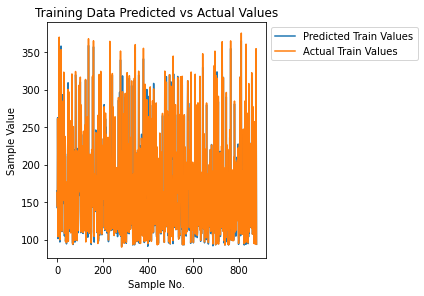

In [ ]:
plt.plot(train_predictions, label='Predicted Train Values')
plt.plot(train_true, label='Actual Train Values')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xlabel('Sample No.')
plt.ylabel('Sample Value')
plt.tight_layout()
plt.title('Training Data Predicted vs Actual Values')
plt.savefig('q2_train_loop.png')

Text(0.5, 1.0, 'Testing Data Predicted vs Actual Values')

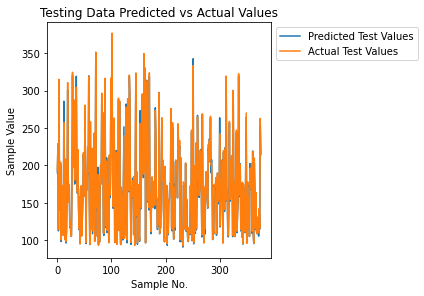

In [ ]:
plt.plot(test_predictions, label='Predicted Test Values')
plt.plot(test_true, label='Actual Test Values')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xlabel('Sample No.')
plt.ylabel('Sample Value')
plt.tight_layout()
plt.savefig('q2_test_loop.png')
plt.title('Testing Data Predicted vs Actual Values')

In [ ]:
test_predictions[:5], test_true[:5]

(array([[190.09248],
        [226.25716],
        [112.57083],
        [306.7025 ],
        [145.64038]], dtype=float32), array([[193.63],
        [228.99],
        [114.42],
        [315.03],
        [148.7 ]], dtype=float32))

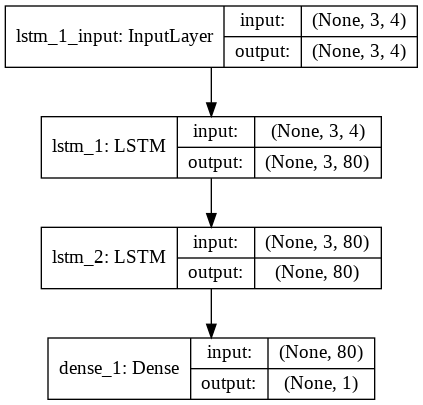

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='q2_model_plot.png', show_shapes=True, show_layer_names=True)

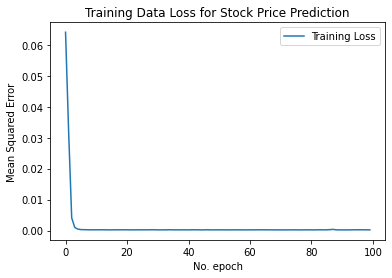

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('Training Data Loss for Stock Price Prediction')
plt.ylabel('Mean Squared Error')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.savefig('q2_train_loss.png')
plt.show()

In [ ]:
model.save('q2_model.h5')